In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import os

In [56]:
df_list = []

path = '../Data/'

for data in os.listdir(path):
    if data.split(".")[1] == 'csv':
        df = pd.read_csv(path + data)
        df_list.append(df)

data = pd.concat(
    df_list, ignore_index=False
)
df = data.copy()
df = df.drop(columns=['Unnamed: 0'])

nan_df = df[df['Content'].isna()]
nan_df.to_csv('nan_df.csv', index=False)

In [93]:
len(data['News_type'].value_counts())

267

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170830 entries, 0 to 402
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Title                170830 non-null  object
 1   Content              119249 non-null  object
 2   Content_url          170830 non-null  object
 3   News_type            170829 non-null  object
 4   Day_month_year_hour  170830 non-null  object
 5   Img_url              170830 non-null  object
dtypes: object(6)
memory usage: 9.1+ MB


In [58]:
df = df.dropna()
df = df.drop_duplicates()
print(f"len df {len(df)}")

len df 112828


In [59]:
def split_date_to_year(day_month_year_hour):
    date = day_month_year_hour.split('-')[0]
    year = "20" + date.split('.')[2]
    return year

def split_date_to_month(day_month_year_hour):
    date = day_month_year_hour.split('-')[0]
    year = date.split('.')[1]
    return year

def split_date_to_day(day_month_year_hour):
    date = day_month_year_hour.split('-')[0]
    year = date.split('.')[0]
    return year

df['Yeary'] = df['Day_month_year_hour'].apply(split_date_to_year)
df['Month'] = df['Day_month_year_hour'].apply(split_date_to_month)
df['Day'] = df['Day_month_year_hour'].apply(split_date_to_day)

df = df.drop(columns=['Day_month_year_hour'])

<Axes: ylabel='count'>

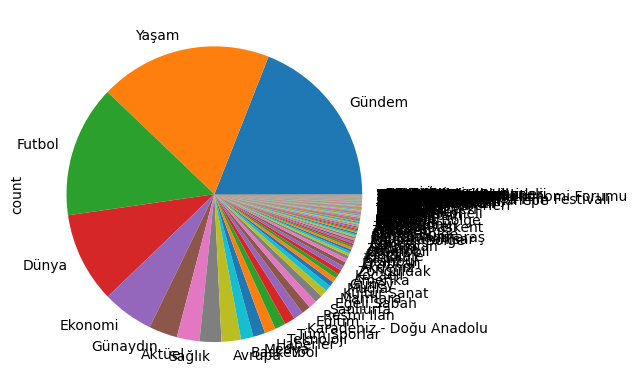

In [60]:
df.News_type.value_counts().plot(kind='pie')

In [61]:
with open("../Preprocess-Data/iller.txt", 'r', encoding='utf-8') as f:
    cities = f.readlines()

cities = [city.strip() for city in cities] + [
    'Kayseri Bölge', 'Karadeniz - Doğu Anadolu', 'Egeli Sabah', 'Marmara', 'Ankara Başkent', 'Akdeniz',
    'Güney'
    ]

def categorize_local(news_type):
    if news_type in cities:
        return "yerel"
    else:
        return news_type
    
df['News_type'] = df['News_type'].apply(categorize_local)

In [95]:
sports_teams = [
    "Beşiktaş", "Futbol", "Fenerbahçe",  "Galatasaray", "Trabzonspor", 'Türkiye Kupası', 'Euro 2020',
    'TFF 1. Lig', 'Spor Magazin', 'Transfer Haberleri'
]

def categorize_sports(news_type):
    if news_type in sports_teams:
        return "futbol"
    else:
        return news_type

df['News_type'] = df['News_type'].apply(categorize_sports)

In [96]:
gloabl_list = ['Amerika', "Avrupa"]

def convert_global(news_type):
    if news_type in gloabl_list:
        return "Dünya"
    else:
        return news_type

df['News_type'] = df['News_type'].apply(convert_global)    

In [97]:
recipes_categories = [
    "Kahvaltılık Tarifler", "Çorbalar", "Sebze Yemekleri", "Vegan Tarifler", "Vejetaryen Tarifler",
    "Makarna Ve Pilav Tarifleri", "Yemek Tarifleri", "Kekler", "Salata ve Mezeler", 
    "Kurabiye Tarifleri", "Yemek", "Tatlılar", "Et Yemekleri", "Sağlıklı Tarifler",
    "Hamur İşi", 'Mutfak Sırları', 'İçecek Tarifleri', 'Tatlı Tarifleri', 'Börekler-Çörekler ve Poğaçalar',
    'Soslar ve İçecekler', 'Diğer Tarifler', 'Çorba Tarifleri', 'Pilav Tarifleri', 'Hamurişi Tarifleri',
    'Salata & Meze & Kanepe', 'Makarna Tarifleri', 'Bakliyat Yemekleri', 'Dolma-Sarma Tarifleri',
    'Sandviç Tarifleri', 'Aperatifler'
]
    
def categorize_recipes(news_type):
    if news_type in recipes_categories:
        return "Yemek Tarifleri"
    else:
        return news_type

df['News_type'] = df['News_type'].apply(categorize_recipes)

In [98]:
health_topics = ["Sağlık", "Çocuk Sağlığı", "Ruh Sağlığı", "Kadın Sağlığı", "Erkek Sağlığı"]

def categorize_health(news_type):
    if news_type in health_topics:
        return "Sağlık"
    else:
        return news_type

df['News_type'] = df['News_type'].apply(categorize_health)

In [99]:
personal_care_categories = [
    "Makyaj", "Saç Bakımı", "Cilt Bakımı", "Güzellik"
]

def categorize_personal_care(news_type):
    if news_type in personal_care_categories:
        return "Kişisel Bakım"
    else:
        return news_type

  
df['News_type'] = df['News_type'].apply(categorize_personal_care)

In [100]:
finans_categories = [
    "Finans Kripto Para Haberleri", "Ekonomi", "Finans Şirket Haberleri", "Finans Altın Haberleri", 
    "Finans Emtia-Döviz Haberleri", "Finans Borsa Haberleri", "Finans Gündem Haberleri", "Finans Ekonomi Haberleri",
]

def categorize_finans(news_type):
    if news_type in finans_categories:
        return "Finans"
    else:
        return news_type

  
df['News_type'] = df['News_type'].apply(categorize_finans)

<Axes: ylabel='count'>

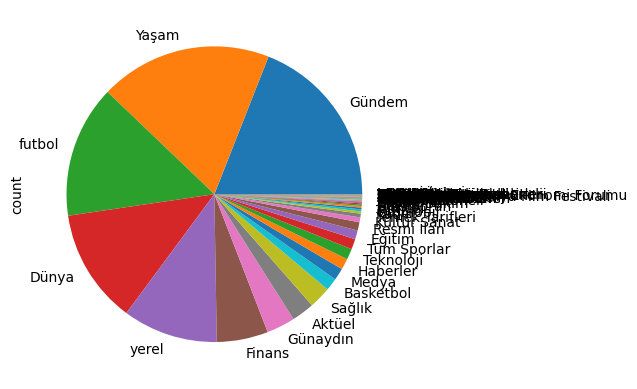

In [101]:
df.News_type.value_counts().plot(kind='pie')

In [102]:
a = 0
df['News_type'].value_counts()[a:a+20]

News_type
Gündem             21469
Yaşam              21242
futbol             16332
Dünya              14136
yerel              11737
Finans              6334
Günaydın            3518
Aktüel              2797
Sağlık              2709
Basketbol           1540
Medya               1484
Haberler            1363
Teknoloji           1327
Tüm Sporlar         1283
Eğitim              1106
Resmi İlan          1010
Kültür Sanat         605
Yemek Tarifleri      459
Kadın                277
Otomobil             248
Name: count, dtype: int64

In [103]:
a = 20
df['News_type'].value_counts()[a:a+20]

News_type
Turizm               215
Güncel               209
Bize Sorun           167
Çocuk                147
Kişisel Bakım        135
Hamilelik             86
Bebek                 83
Spor                  74
Pazar Sabah           72
Kamu Personeli        66
İLANLAR               60
Ramazan               46
Ramazan Haberleri     35
Cumartesi Sabah       33
Bebeğim ve Biz        29
Emniyet Personeli     23
Moda                  23
Diyet                 23
Beslenme              22
Aile ve İlişkiler     21
Name: count, dtype: int64

In [104]:
a = 40
df['News_type'].value_counts()[a:a+20]

News_type
Bölgeler                               18
Oyun                                   18
Askeri Personel                        17
Uluslararası Antalya Film Festivali    16
EMEKLİ                                 16
Öğretmen                               12
İşte İnsan                             11
Sağlık Personeli                       11
Elektrik Kesintisi                     11
Kitap                                  11
Temizlik                               10
Diyet Yemekleri                        10
Keşfet                                 10
İlişkiler                              10
Teknokulis                              9
Uluslararası Futbol Ekonomi Forumu      9
Seçim                                   7
Çocuklar İçin                           7
KPSS                                    7
Sözleşmeli Personel                     7
Name: count, dtype: int64

In [105]:
a = 60
df['News_type'].value_counts()[a:a+20]

News_type
Rüya Tabirleri              7
Egzersizler                 6
15 Temmuz İhaneti           5
Dini Hizmetler Personeli    4
Stil ve Öneri               4
Güncel Memur Haberleri      3
Memurlar                    3
Bebekler İçin               3
Emlak                       3
Teknik Personel             3
Aile                        2
Astroloji                   2
Sürekli İşçi                2
Güzel Sözler                1
Doğum                       1
Akademik Personel           1
Vodafone Business           1
Engelli Memur               1
Hakim ve Savcı              1
Gezegen Hareketleri         1
Name: count, dtype: int64

In [106]:
a = 80
df['News_type'].value_counts()[a:a+20]

News_type
Doğalgaz Kesintisi    1
Basın İlan Kurumu     1
Name: count, dtype: int64